# Context

In this machine learning project, we will recognize handwritten characters, i.e, alphabets from `A-Z`. For this we are going to train a neural network with dataset containing images of alphabets. The [dataset](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format) is from Kaggle and  contains 26 folders (A-Z) containing handwritten images in size `28x28 pixels`, each alphabet in the image is centre fitted to 20x20 pixel box. Each image is stored as `Gray-level`. Note that the dataset might contain some noisy images as well.

# Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

# Read the data

In [2]:
data = pd.read_csv("A_Z Handwritten Data.csv").astype(np.float32)

data.shape

(372450, 785)

Note that, from dimensions, images are flattened (28x28 = 784 + (label index) = 785)

In [3]:
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.tail(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372440,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372441,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372442,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372443,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372444,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split the data

In [6]:
# Before splitting the data using training and test data, let's seperate images from labels

X = data.drop(columns='0', axis=1)
y = data['0']

# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# Reshape the images

x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print("Train data shape : ", x_train.shape)
print("Test data shape : ", x_test.shape)

Train data shape :  (297960, 28, 28)
Test data shape :  (74490, 28, 28)


In [8]:
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 6270       0.0
172564    14.0
9880       0.0
212499    15.0
8305       0.0
          ... 
135255    13.0
282280    18.0
365418    24.0
238617    18.0
83780      9.0
Name: 0, Length: 297960, dtype: float32>

As labels are in the form of flotting point values, we will convert them into integer values and plot their distribution

In [9]:
# character dictionnary
idx2char = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

C:\Users\silve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


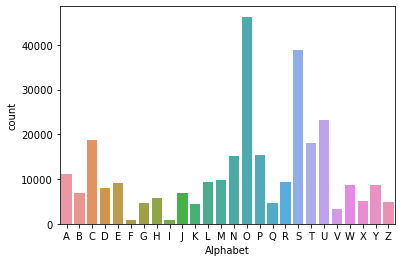

In [10]:
y_train = np.array(y_train).astype(np.int64)
y_test = np.array(y_test).astype(np.int64)

fig, ax = plt.subplots()
sns.countplot(y_train)

labels = [idx2char[int(item.get_text())] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.xlabel("Alphabet")
plt.show()


From above figure, we can see that some character are over represented in the dataset.

Let's take a closer look on some images:

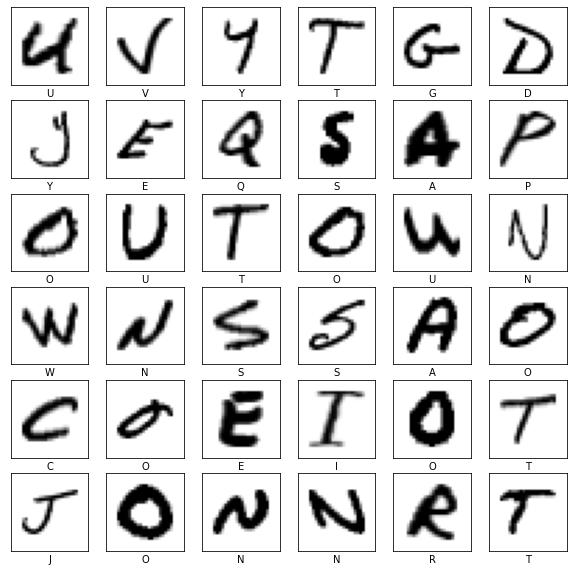

In [11]:
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(x_train.shape[0], 36)
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(x_train[image_ind], cmap=plt.cm.binary)
    plt.xlabel(idx2char[y_train[image_ind]])

## Make the data ready for CNN model

In [12]:
# Add channel dimension to images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# One-Hot encode the targets
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=26, dtype=np.int64)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=26, dtype=np.int64)

print("Training images shape : ", x_train.shape)
print("Training labels shape : ", y_train_oh.shape)

print("Test images shape : ", x_test.shape)
print("Test labels shape : ", y_test_oh.shape)

Training images shape :  (297960, 28, 28, 1)
Training labels shape :  (297960, 26)
Test images shape :  (74490, 28, 28, 1)
Test labels shape :  (74490, 26)


# CNN model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),    
    tf.keras.layers.Dense(units=26, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

## Compile and Fit the model

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


epochs = 5

history = model.fit(x_train, y_train_oh, epochs=epochs, validation_data=(x_test, y_test_oh))
print("Model successfully trained ...\nSaving the model ...")
model.save('model_hand.h5')
print("Model saved as ''model_hand.h5'")

Epoch 1/5
9312/9312 [==============================] - 274s 29ms/step - loss: 0.1595 - accuracy: 0.9569 - val_loss: 0.0773 - val_accuracy: 0.9788
Epoch 2/5
9312/9312 [==============================] - 303s 32ms/step - loss: 0.0700 - accuracy: 0.9807 - val_loss: 0.0691 - val_accuracy: 0.9812
Epoch 3/5
9312/9312 [==============================] - 284s 31ms/step - loss: 0.0599 - accuracy: 0.9837 - val_loss: 0.0744 - val_accuracy: 0.9802
Epoch 4/5
9312/9312 [==============================] - 257s 28ms/step - loss: 0.0542 - accuracy: 0.9853 - val_loss: 0.0559 - val_accuracy: 0.9860
Epoch 5/5
9312/9312 [==============================] - 336s 36ms/step - loss: 0.0513 - accuracy: 0.9862 - val_loss: 0.0517 - val_accuracy: 0.9878
Model successfully trained ...
Saving the model ...
Model saved as ''model_hand.h5'


In [15]:
# Let's check the model

loaded_model = tf.keras.models.load_model('model_hand.h5')
np.testing.assert_allclose(
    model.predict(x_test), loaded_model.predict(x_test)
)

In [16]:
print("Training accuracy : %.4f%s" %(history.history['accuracy'][-1]*100, '%'))

print("Validation accuracy :  %.4f%s" %(history.history['val_accuracy'][-1]*100,'%'))

Training accuracy : 98.6156%
Validation accuracy :  98.7757%


# Run some Predictions on Test Data

In [17]:
# Load model
loaded_model = tf.keras.models.load_model('model_hand.h5')

# Make predictions
preds = loaded_model.predict(x_test)
preds = np.argmax(preds, axis=1)

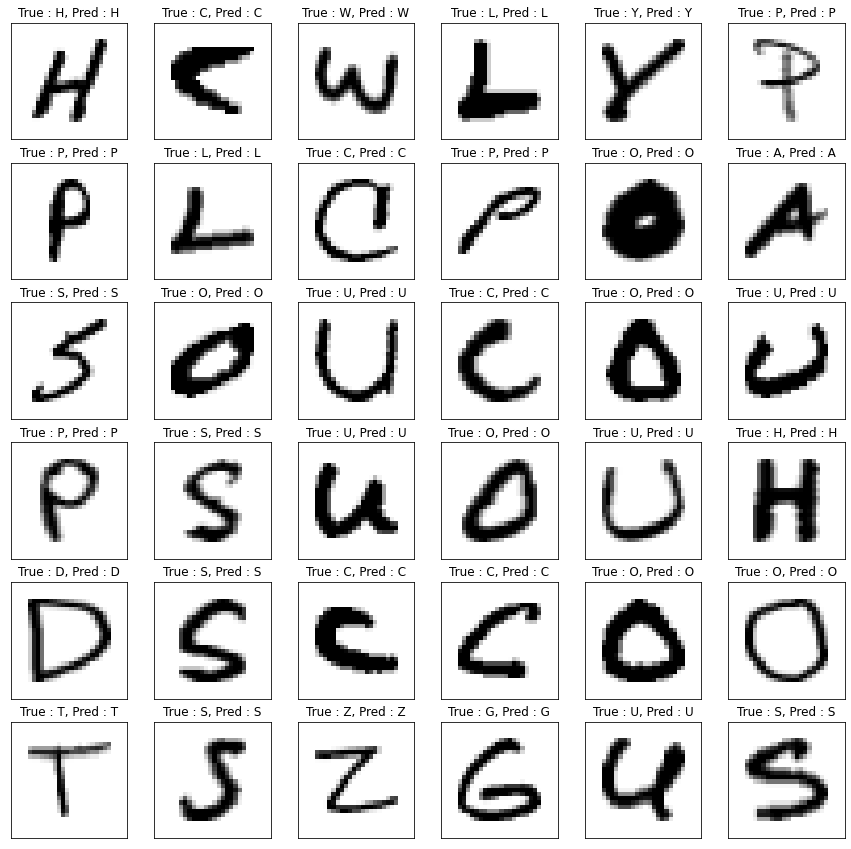

In [18]:
random_inds = np.random.choice(x_test.shape[0], 36)

plt.figure(figsize=(15, 15))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(x_test[image_ind], cmap=plt.cm.binary)
    plt.title(f"True : {idx2char[y_test[image_ind]]}, Pred : {idx2char[preds[image_ind]]}")